# Analysis of Perth/2009 H3 HA mutant libraries generated by reverse genetics

# Import modules, define directories

In [1]:
import os
import re
import glob
import subprocess
import pandas as pd
import seaborn as sns
import collections

import dms_tools2
import dms_tools2.sra
import dms_tools2.plot
import dms_tools2.prefs
from dms_tools2.ipython_utils import showPDF
import warnings
warnings.simplefilter('ignore') # don't print warnings to avoid clutter in notebook
from IPython.display import display, HTML, Markdown
# from pymodules.utils import * # custom modules for this analysis

print("Using dms_tools2 version {0}".format(dms_tools2.__version__))

# CPUs to use, should not exceed the number you request with slurm
ncpus = -1

# do we use existing results or generate everything new?
use_existing = 'yes'

inputdir = './data/'

resultsdir = './results/'
fastqdir = os.path.join(resultsdir, 'FASTQ_files/')
countsdir = os.path.join(resultsdir, 'codoncounts/')
plotsdir = os.path.join(resultsdir, 'plots/')

for d in [resultsdir, fastqdir, countsdir, plotsdir]:
    os.makedirs(d, exist_ok=True)

Using dms_tools2 version 2.4.12


## Display Sanger sequencing data

Average **1.6 codon substitutions** per clone.

In [7]:
sangerprefix = './data/SangerAnalysis/'

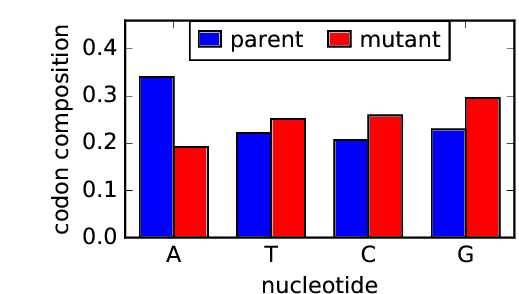

In [8]:
showPDF(sangerprefix + 'codonmutntcomposition.pdf')

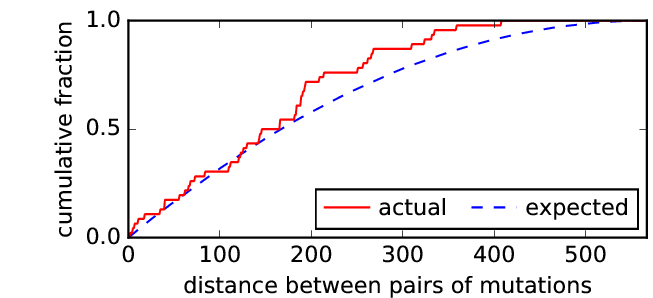

In [9]:
showPDF(sangerprefix + 'mutationclustering.pdf')

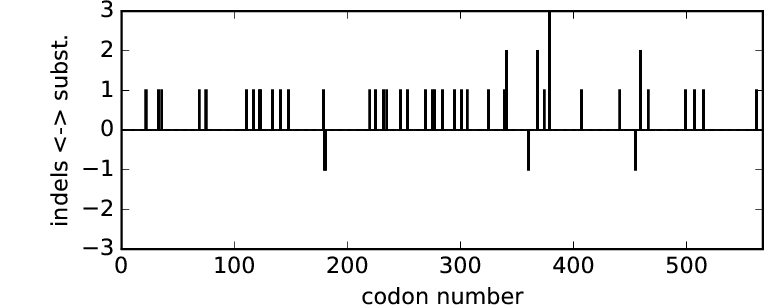

In [10]:
showPDF(sangerprefix + 'mutpositions.pdf')

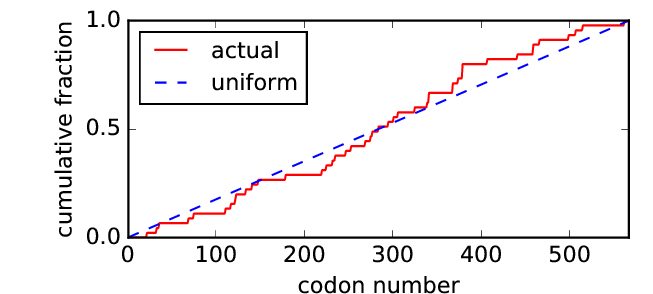

In [11]:
showPDF(sangerprefix + 'mutpositions_cumulative.pdf')

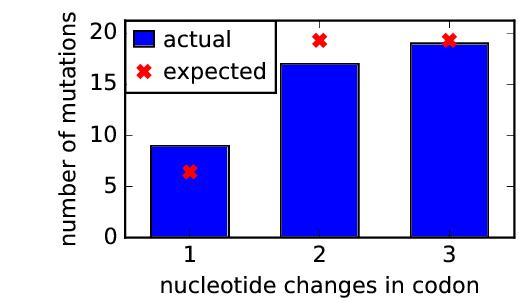

In [12]:
showPDF(sangerprefix + 'ncodonmuts.pdf')

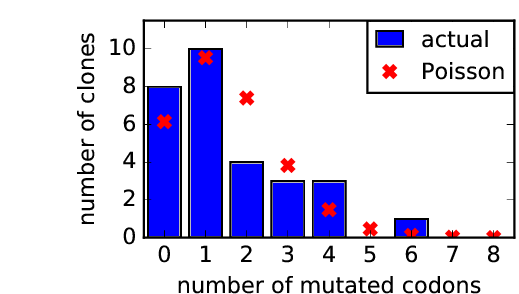

In [13]:
showPDF(sangerprefix + 'nmutdist.pdf')

## Get FASTQ files
Symbolically link to the files on the server.

In [2]:
log = !python ./data/symlink_fastq.py
print("Symbolically linked FASTQ files to {0}".format(fastqdir))

Symbolically linked FASTQ files to ./results/FASTQ_files/


## Define the samples

I will create a `pandas` dataframe to define the samples with its corresponding sample name. I will also create a dummy column.

In [3]:
samples = pd.DataFrame([('wtDNA', 'WT-pHH-plasmid_R1_*.fastq.gz')] + 
                       [('wtvirus-A', 'WTvirus-A_R1_*.fastq.gz')] + 
                       [('wtvirus-B', 'WTvirus-B_R1_*.fastq.gz')] + 
                       [('wtvirus-C', 'WTvirus-C_R1_*.fastq.gz')] +
                       [('mutDNA-4', 'mutDNA-4_R1_*.fastq.gz')] + 
                       [('mutDNA-5', 'mutDNA-5_R1_*.fastq.gz')] +
                       [('mutDNA-6', 'mutDNA-6_R1_*.fastq.gz')] +
                       [('mutvirus-4', 'mutvirus-4_R1_*.fastq.gz')] + 
                       [('mutvirus-5', 'mutvirus-5_R1_*.fastq.gz')] + 
                       [('mutvirus-6', 'mutvirus-6_R1_*.fastq.gz')], 
                       columns = ['name', 'R1'])

display(HTML(samples.to_html(index=False)))

name,R1
wtDNA,WT-pHH-plasmid_R1_*.fastq.gz
wtvirus-A,WTvirus-A_R1_*.fastq.gz
wtvirus-B,WTvirus-B_R1_*.fastq.gz
wtvirus-C,WTvirus-C_R1_*.fastq.gz
mutDNA-4,mutDNA-4_R1_*.fastq.gz
mutDNA-5,mutDNA-5_R1_*.fastq.gz
mutDNA-6,mutDNA-6_R1_*.fastq.gz
mutvirus-4,mutvirus-4_R1_*.fastq.gz
mutvirus-5,mutvirus-5_R1_*.fastq.gz
mutvirus-6,mutvirus-6_R1_*.fastq.gz


## Align deep sequencing data and count mutations

In [4]:
# Reference coding sequence of Perth/2009 HA; from plasmid #1535 pICR2-Perth09-HA
refseq = './data/Perth09_HA_reference.fa'

# Temporary align specs
alignspecs = ' '.join(['1,285,38,40', '286,567,33,34', '568,852,34,30', 
                       '853,1137,34,31', '1138,1422,36,29', '1423,1701,39,44'])

# write sample information to a batch file for dms2_batch_bcsubamplicons
countsbatchfile = os.path.join(countsdir, 'batch.csv')
samples.to_csv(countsbatchfile, index=False)

print('\nNow running dms2_batch_bcsubamp...')
log = !dms2_batch_bcsubamp \
        --batchfile {countsbatchfile} \
        --refseq {refseq} \
        --alignspecs {alignspecs} \
        --outdir {countsdir} \
        --summaryprefix summary \
        --R1trim 200 --R2trim 165 \
        --fastqdir {fastqdir} \
        --ncpus {ncpus} \
        --use_existing {use_existing}

print('Completed dms2_batch_bcsubamp.')


Now running dms2_batch_bcsubamp...
Completed dms2_batch_bcsubamp.


In [5]:
!ls {countsdir}/*_codoncounts.csv

./results/codoncounts//DF-1_codoncounts.csv
./results/codoncounts//mutDNA-4_codoncounts.csv
./results/codoncounts//mutDNA-5_codoncounts.csv
./results/codoncounts//mutDNA-6_codoncounts.csv
./results/codoncounts//mutvirus-4_codoncounts.csv
./results/codoncounts//mutvirus-5_codoncounts.csv
./results/codoncounts//mutvirus-6_codoncounts.csv
./results/codoncounts//wtDNA_codoncounts.csv
./results/codoncounts//wtvirus-A_codoncounts.csv
./results/codoncounts//wtvirus-B_codoncounts.csv
./results/codoncounts//wtvirus-C_codoncounts.csv


In [6]:
countsplotprefix = os.path.join(countsdir, 'summary')

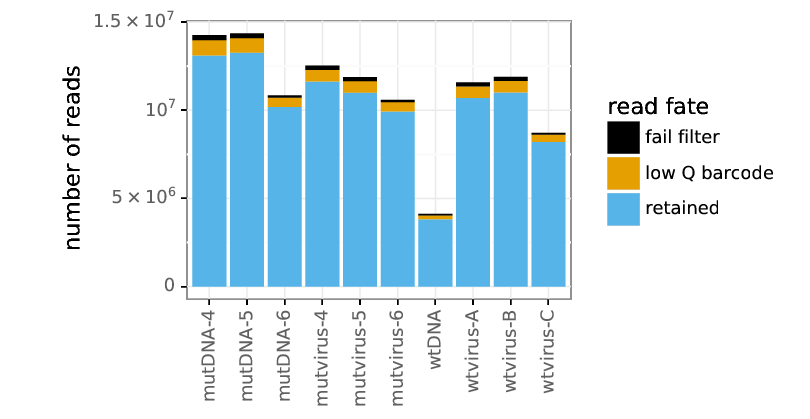

In [7]:
showPDF(countsplotprefix + '_readstats.pdf', width=500)

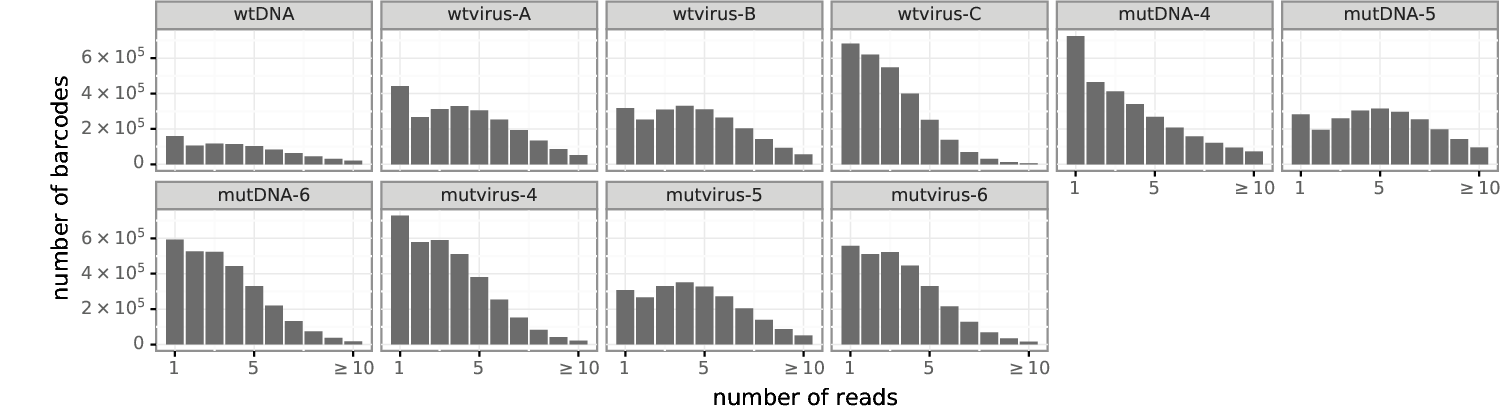

In [8]:
showPDF(countsplotprefix + '_readsperbc.pdf')

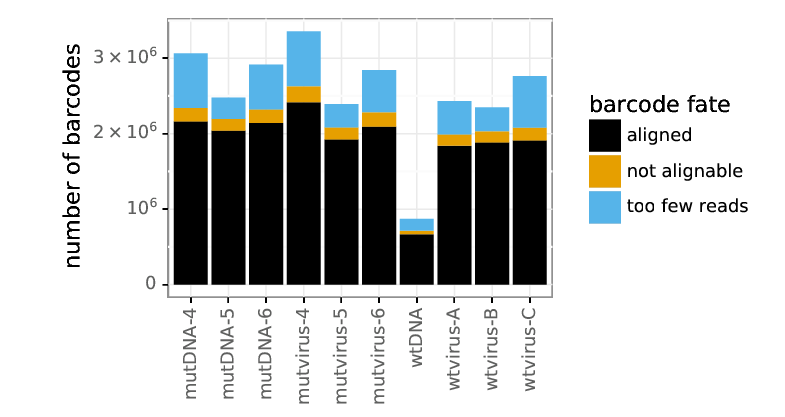

In [9]:
showPDF(countsplotprefix + '_bcstats.pdf', width=500)

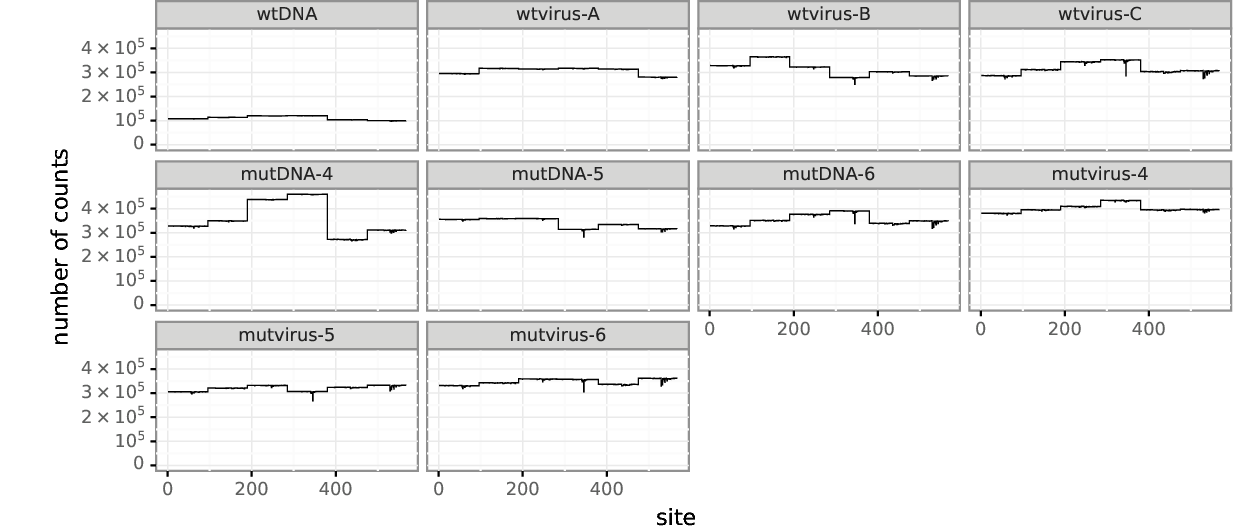

In [10]:
showPDF(countsplotprefix + '_depth.pdf')

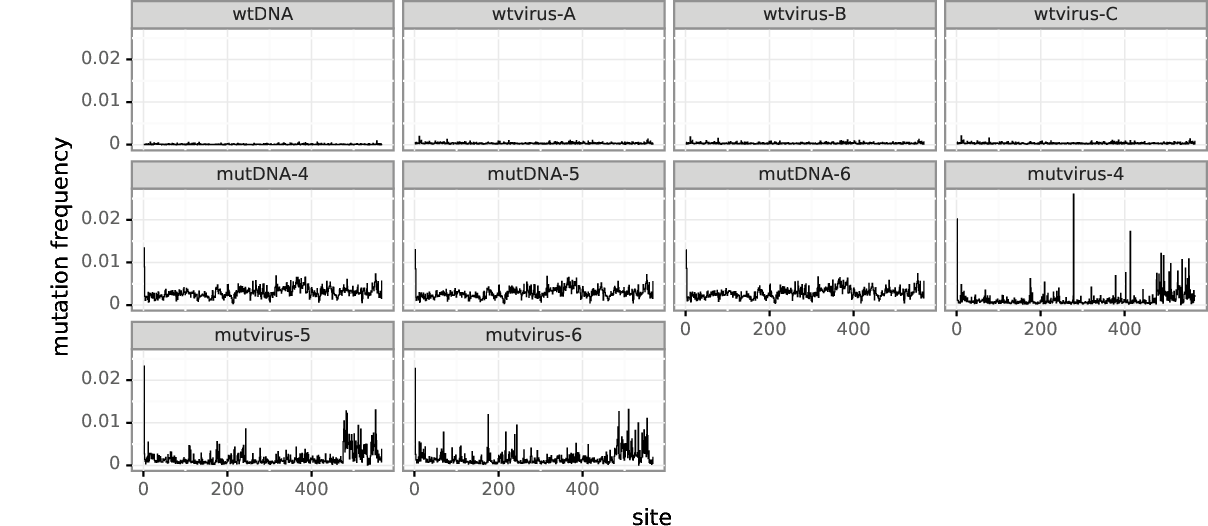

In [11]:
showPDF(countsplotprefix + '_mutfreq.pdf')

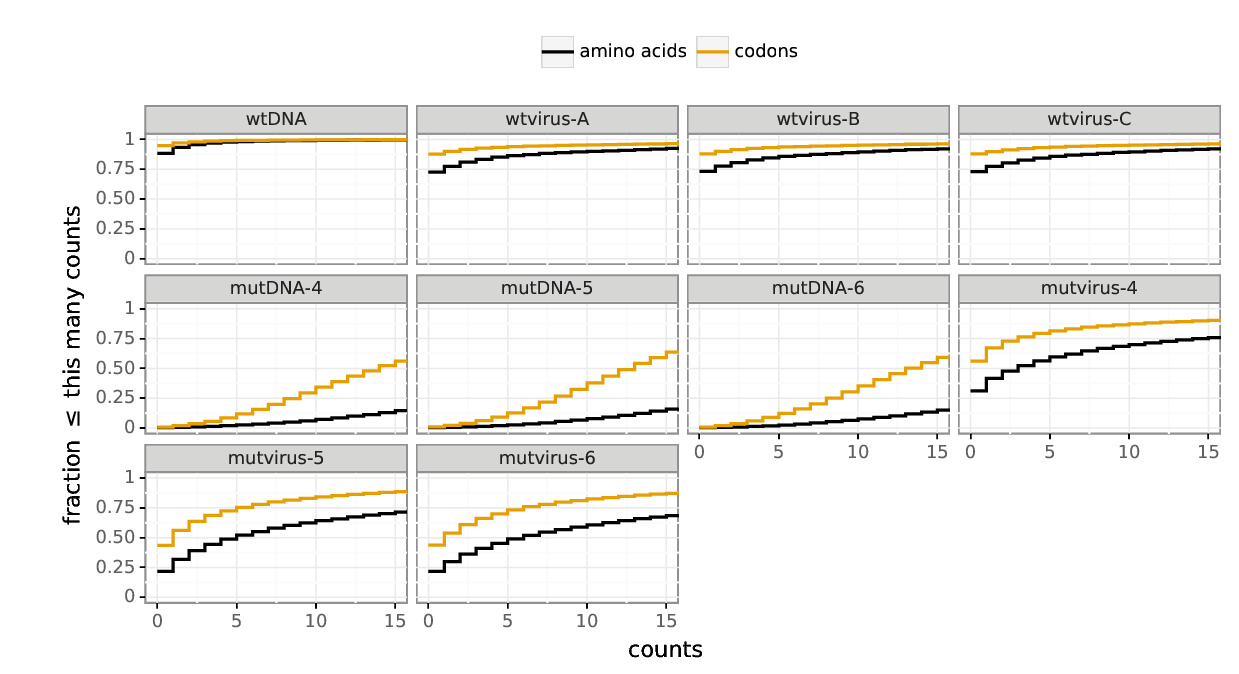

In [12]:
showPDF(countsplotprefix + '_cumulmutcounts.pdf')

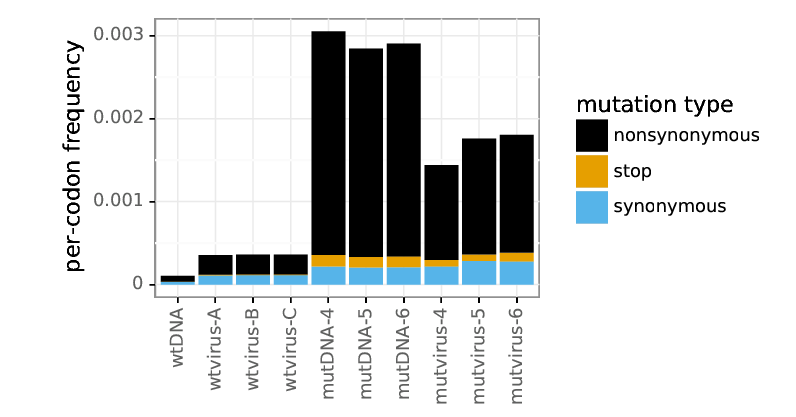

In [13]:
showPDF(countsplotprefix + '_codonmuttypes.pdf', width=500)

In [14]:
codonmuttypes = pd.read_csv(countsplotprefix + '_codonmuttypes.csv').sort_index(axis=1)
display(HTML(codonmuttypes.to_html(index=False)))

name,nonsynonymous,stop,synonymous
wtDNA,0.000071,0.000004,0.000032
wtvirus-A,0.000236,0.000009,0.000112
wtvirus-B,0.000237,0.000009,0.000114
wtvirus-C,0.000238,0.000010,0.000113
mutDNA-4,0.002696,0.000138,0.000218
mutDNA-5,0.002513,0.000127,0.000206
mutDNA-6,0.002565,0.000132,0.000209
mutvirus-4,0.001142,0.000078,0.000219
mutvirus-5,0.001398,0.000079,0.000284
mutvirus-6,0.001422,0.000104,0.000280


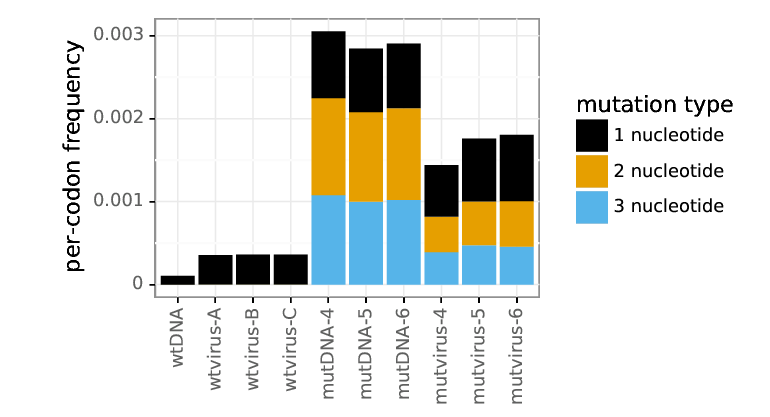

In [15]:
showPDF(countsplotprefix + '_codonntchanges.pdf', width=500)

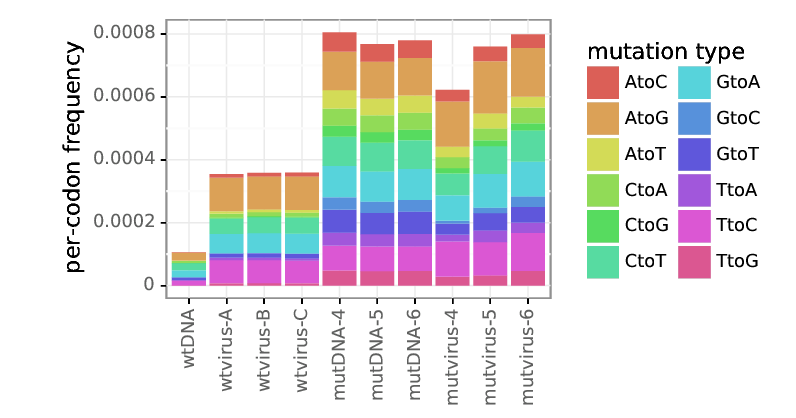

In [16]:
showPDF(countsplotprefix + '_singlentchanges.pdf', width=500)